In [1]:
import torch
import glob
import numpy as np
import pandas as pd
from torch import nn, optim
from torch.nn import functional as F
import time 
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
main_folder = '../data/torch test/'
main_folder_raw = '../data/raw test/'

In [4]:
winLen = 35000

In [5]:
def data_loader(path):  
    allFiles = glob.glob(path + "/*.csv")
    fileNum = 0
    dataTorch = []
    for file_ in allFiles:
        # print(file_)
        singleFile = torch.from_numpy(pd.read_csv(file_, index_col=0, header=None)
                                      .reset_index().values).view(-1,1,winLen)
        dataTorch.append(singleFile) 
        fileNum += 1
        print('File number: ', fileNum, ' out of', len(allFiles), 'finished', 'shape :', singleFile.shape)
    return dataTorch

In [6]:
def load_plot_save(path):
    data = data_loader(path)
    for i in range(len(data)):
        print("Shape of the data {} : ".format(i))
        print(data[i].shape)


#         plt.figure()
#         plt.plot(data[i].narrow(0,0,1).view(-1), label='First window part {}'.format(i))
#         plt.legend()
#         plt.show()
        
#         plt.figure()
#         plt.plot(data[i].narrow(0,data[i].size(0)-1,1).view(-1), label='Last window part {}'.format(i))
#         plt.legend()
#         plt.show()


    data_cat = torch.cat(data, 0)
    print('Data_cat: ', data_cat.shape)


#     plt.figure()
#     plt.plot(data_cat.narrow(0,0,1).view(-1).numpy(), label='First window')
#     plt.legend()
#     plt.show()

#     plt.figure()
#     plt.plot(data_cat.narrow(0,data_cat.size(0)-1,1).view(-1).numpy(), label='Last window')
#     plt.legend()
#     plt.show()
    
    torch.save(data_cat, main_folder+path.split('/')[-2])

# Give me the PATH of the FIRST Category

In [7]:
path = main_folder_raw+"dry/"
load_plot_save(path)

File number:  1  out of 1 finished shape : torch.Size([149, 1, 35000])
Shape of the data 0 : 
torch.Size([149, 1, 35000])
Data_cat:  torch.Size([149, 1, 35000])


In [8]:
path = main_folder_raw+"S12_dry_test/"
load_plot_save(path)

File number:  1  out of 1 finished shape : torch.Size([330, 1, 35000])
Shape of the data 0 : 
torch.Size([330, 1, 35000])
Data_cat:  torch.Size([330, 1, 35000])


In [9]:
path = main_folder_raw+"S13_dry_test/"
load_plot_save(path)

File number:  1  out of 1 finished shape : torch.Size([302, 1, 35000])
Shape of the data 0 : 
torch.Size([302, 1, 35000])
Data_cat:  torch.Size([302, 1, 35000])


In [10]:
path = main_folder_raw+"S14_dry_test/"
load_plot_save(path)

File number:  1  out of 1 finished shape : torch.Size([301, 1, 35000])
Shape of the data 0 : 
torch.Size([301, 1, 35000])
Data_cat:  torch.Size([301, 1, 35000])


# Give me the PATH of the SECOND Category

In [11]:
path = main_folder_raw+"demi/"
load_plot_save(path)

File number:  1  out of 1 finished shape : torch.Size([165, 1, 35000])
Shape of the data 0 : 
torch.Size([165, 1, 35000])
Data_cat:  torch.Size([165, 1, 35000])


# Give me the PATH of the THIRD Category

In [12]:
path = main_folder_raw+"wet/"
load_plot_save(path)

File number:  1  out of 1 finished shape : torch.Size([220, 1, 35000])
Shape of the data 0 : 
torch.Size([220, 1, 35000])
Data_cat:  torch.Size([220, 1, 35000])


In [13]:
def plot_mean(sample):
    data_final = torch.load(main_folder+sample)
    print("Data shape: ", data_final.shape)
    ending_wind = data_final.narrow(2,32000, 3000)
    mean_wind = torch.mean(ending_wind.float(), 2).view(-1)
    plt.figure()
    plt.plot(mean_wind)
    plt.title(sample)

In [14]:
def plot_windows(sample, index):
    data_final = torch.load(main_folder+sample)
    print("Data shape: ", data_final.shape)
    plt.figure()
    for i in range(10):
        plt.plot(data_final.narrow(0,index+i,1).view(-1), label='Window {}'.format(index+i))
    plt.legend()
    plt.title(sample)

Data shape:  torch.Size([149, 1, 35000])


<IPython.core.display.Javascript object>


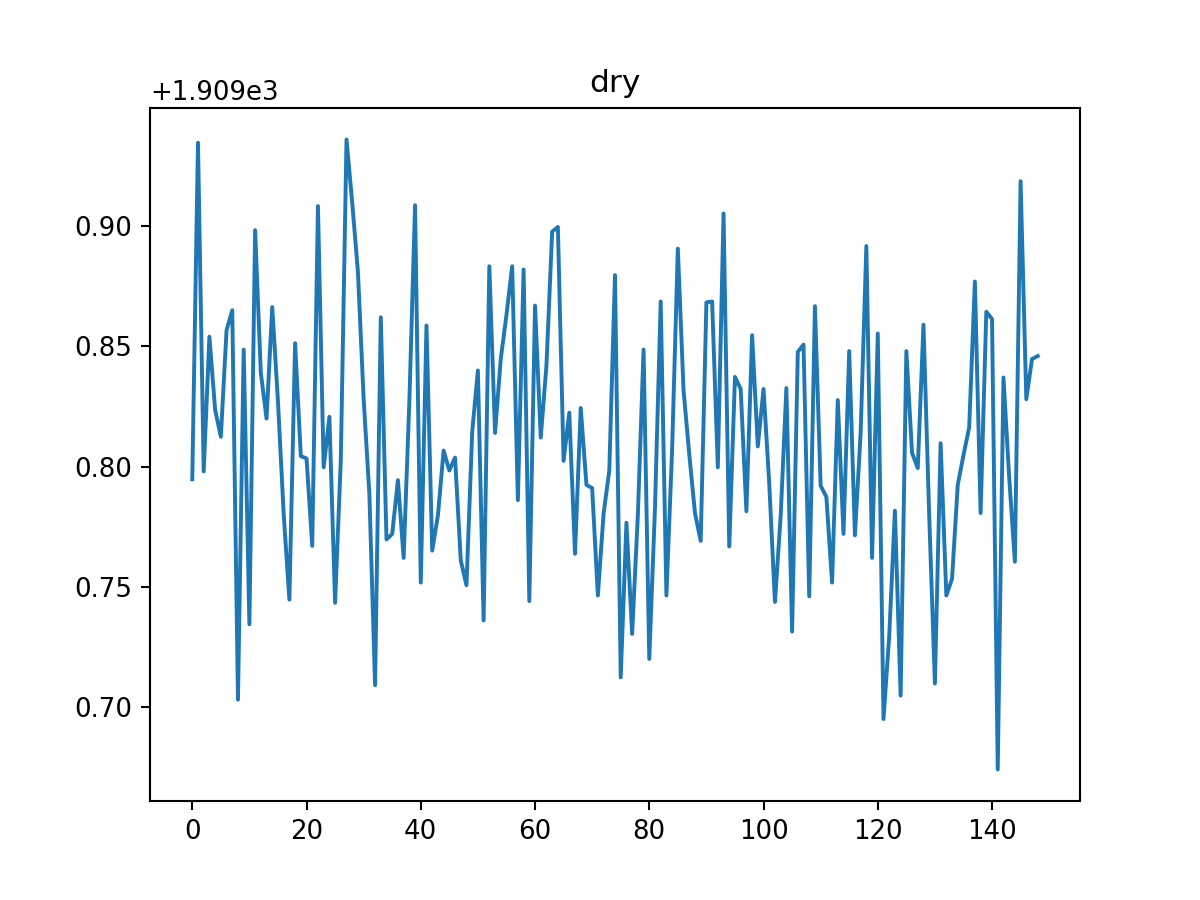

In [15]:
sample = 'dry'
plot_mean(sample)

Data shape:  torch.Size([149, 1, 35000])


<IPython.core.display.Javascript object>


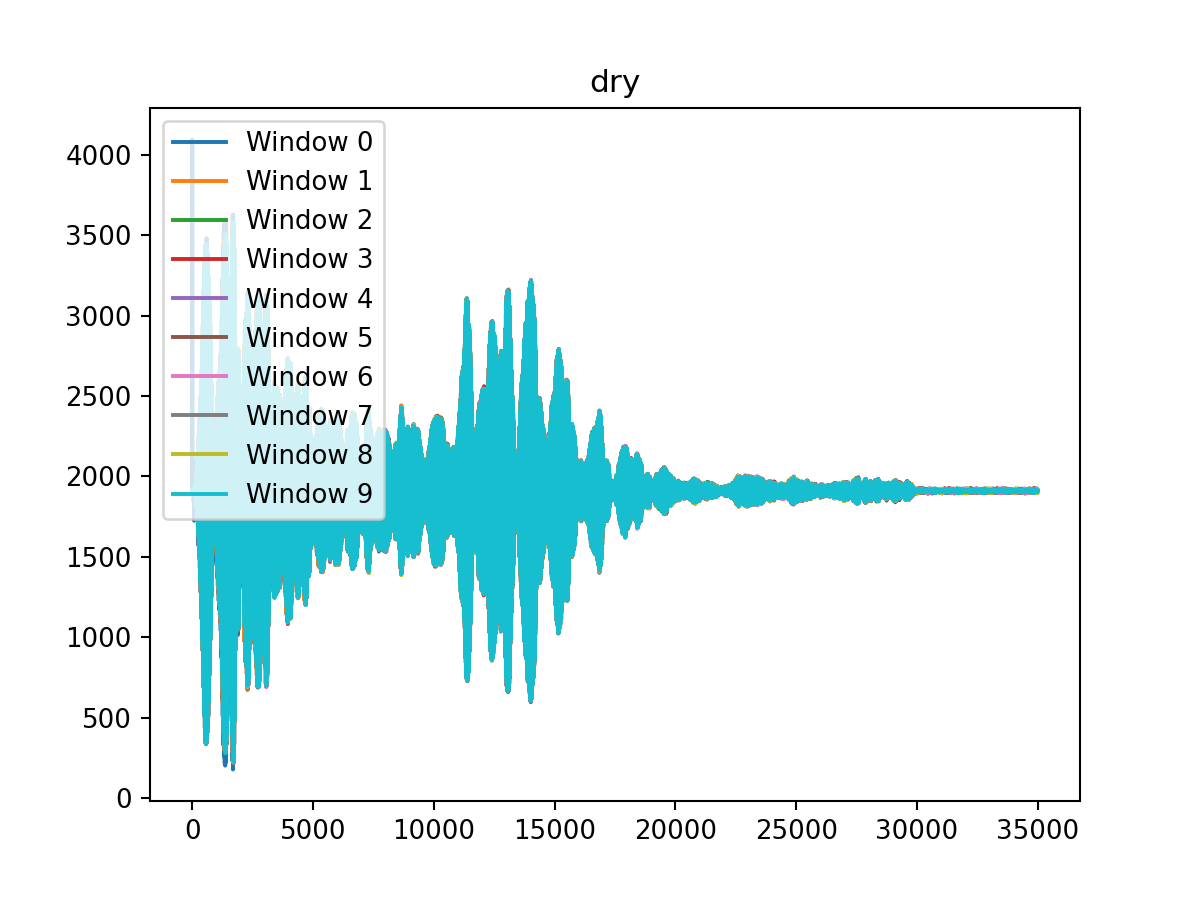

In [16]:
sample = 'dry'
index = 0
plot_windows(sample, index)

Data shape:  torch.Size([330, 1, 35000])


<IPython.core.display.Javascript object>


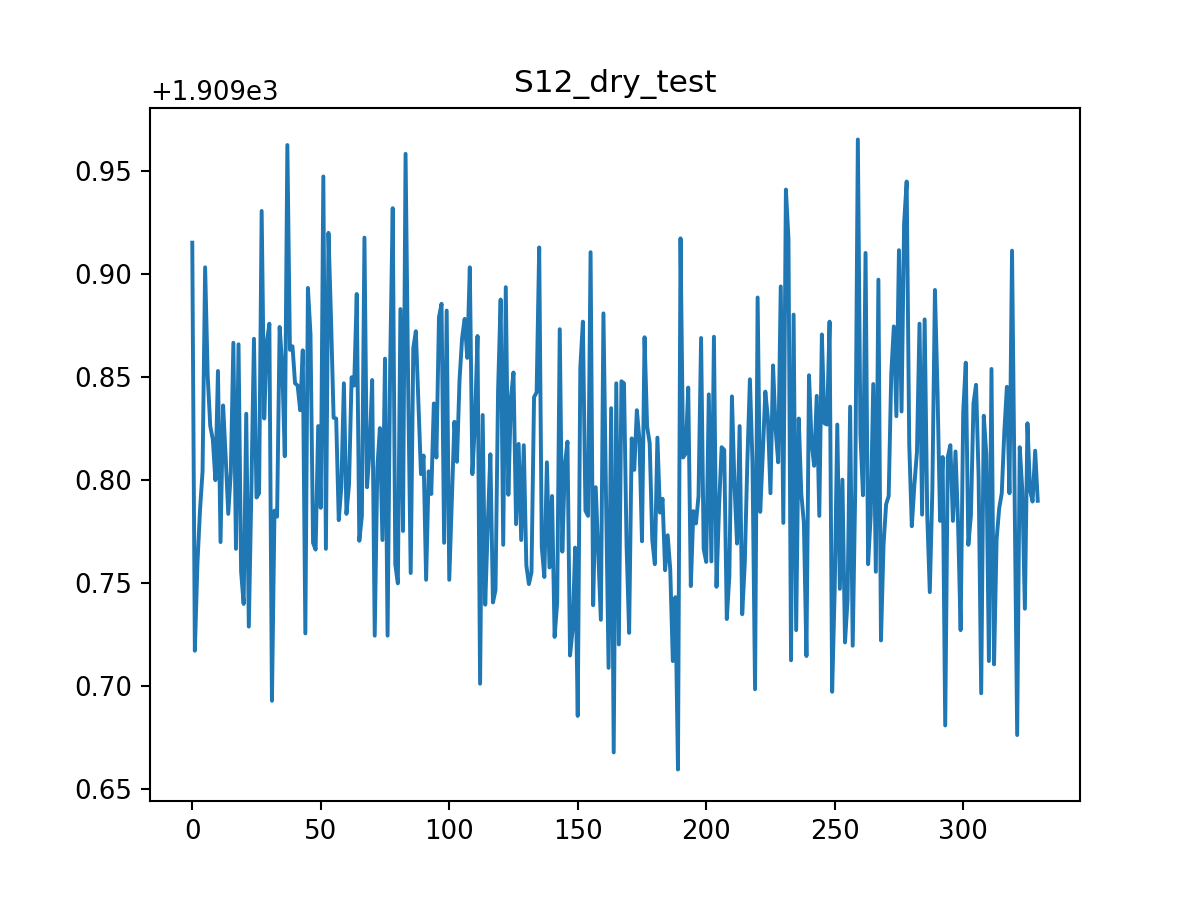

In [17]:
sample = 'S12_dry_test'
plot_mean(sample)

Data shape:  torch.Size([330, 1, 35000])


<IPython.core.display.Javascript object>


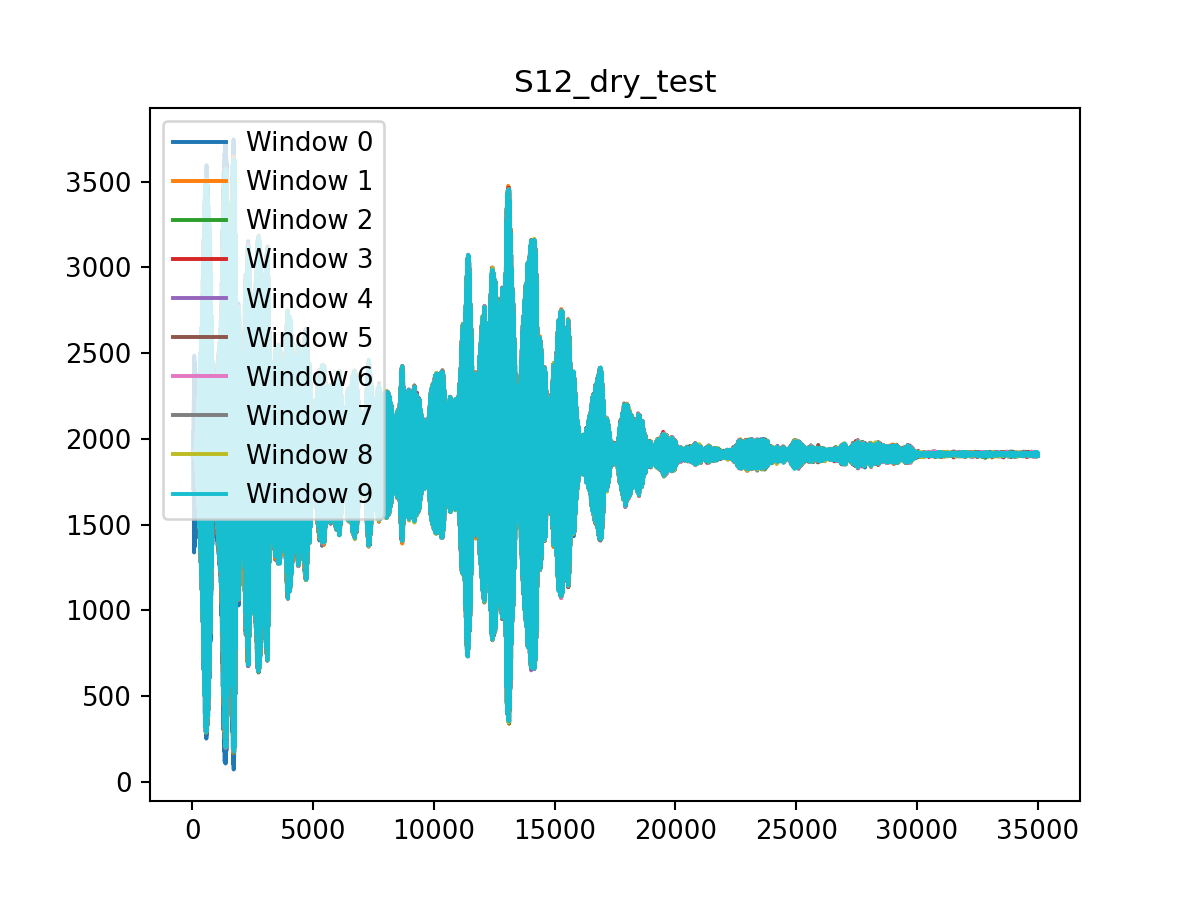

In [18]:
sample = 'S12_dry_test'
index = 0
plot_windows(sample, index)

Data shape:  torch.Size([302, 1, 35000])


<IPython.core.display.Javascript object>


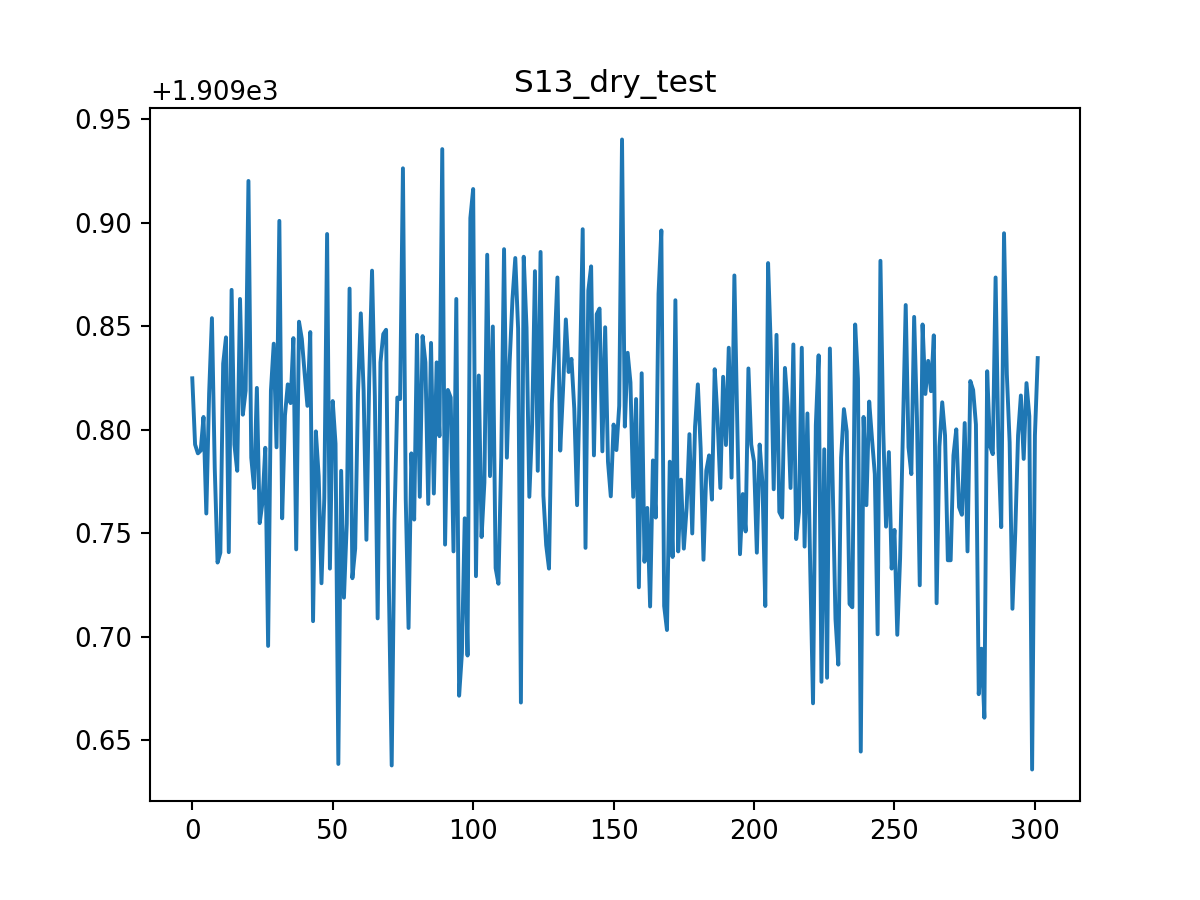

In [19]:
sample = 'S13_dry_test'
plot_mean(sample)

Data shape:  torch.Size([302, 1, 35000])


<IPython.core.display.Javascript object>


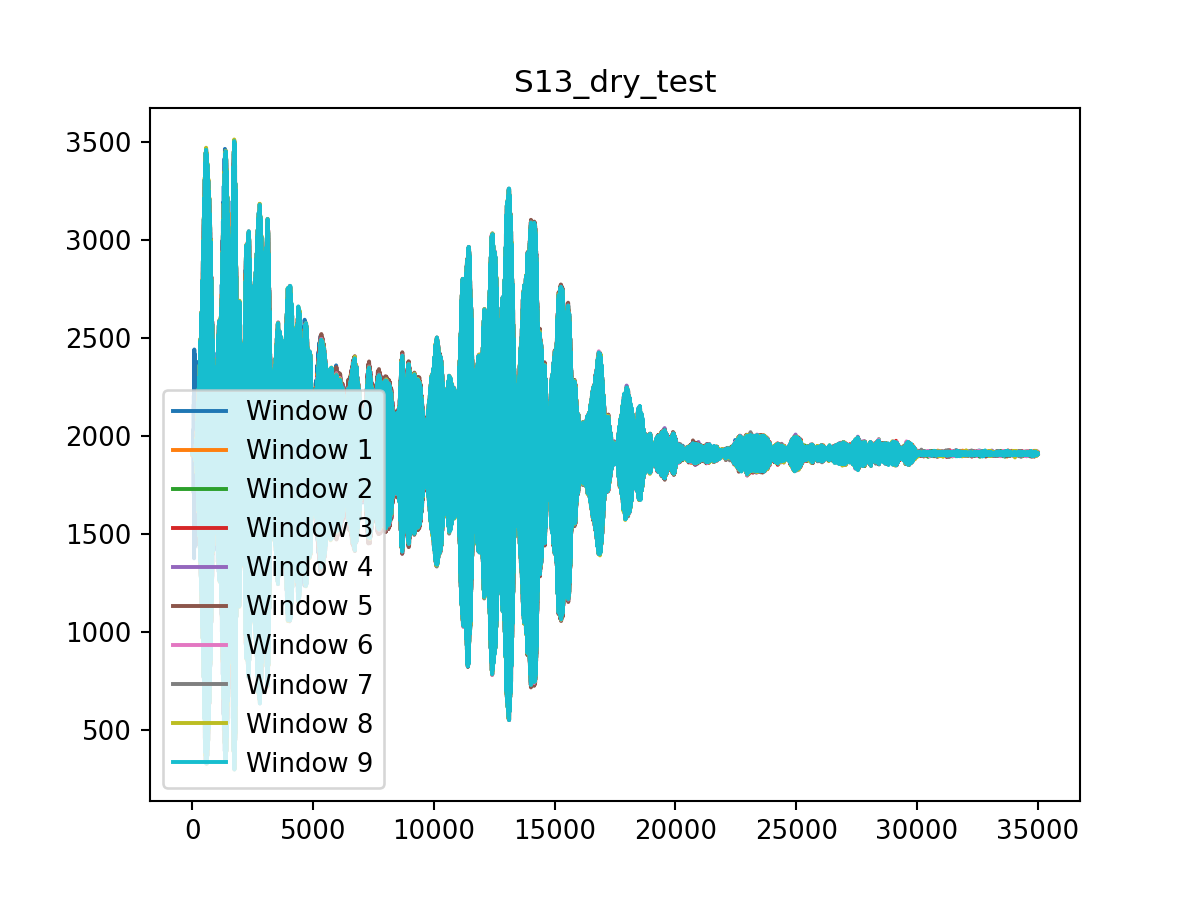

In [20]:
sample = 'S13_dry_test'
index = 0
plot_windows(sample, index)

Data shape:  torch.Size([301, 1, 35000])


<IPython.core.display.Javascript object>


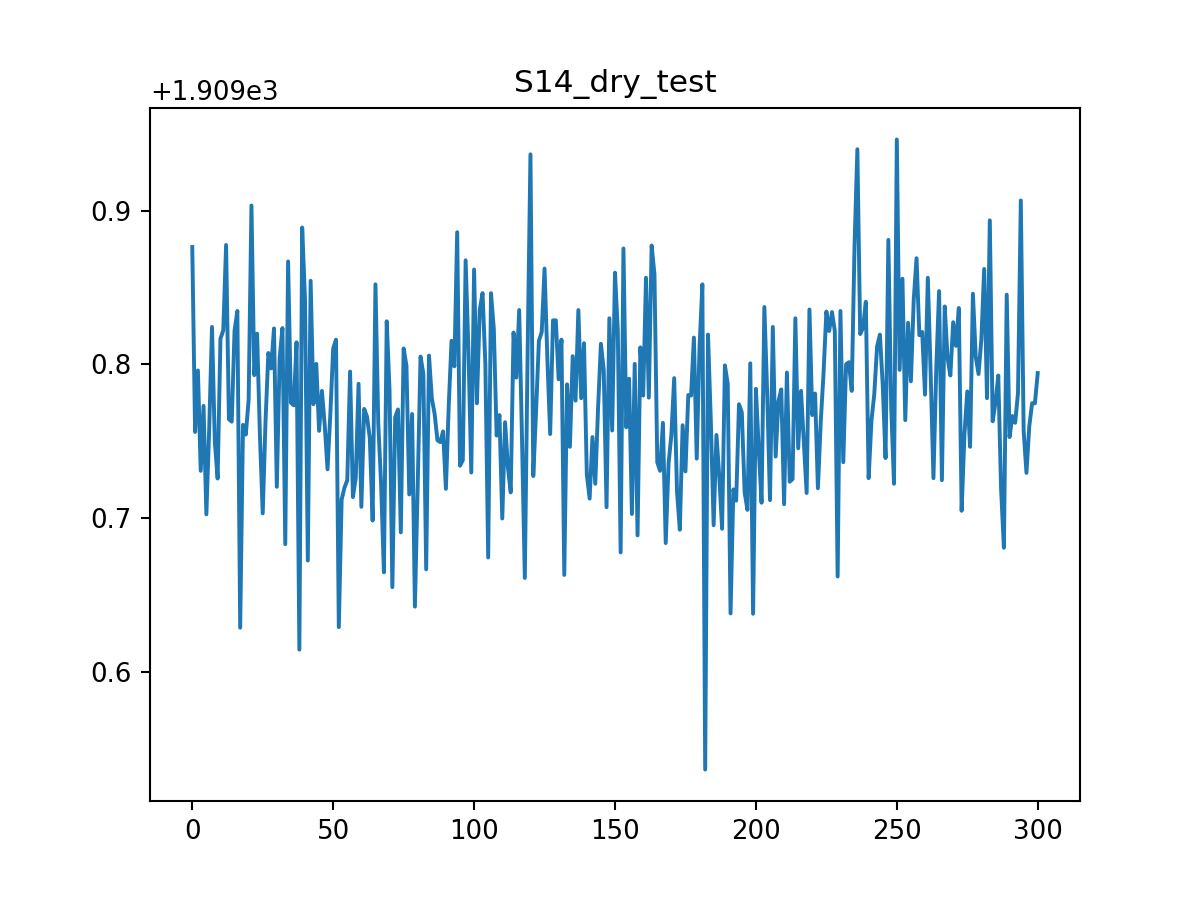

In [21]:
sample = 'S14_dry_test'
plot_mean(sample)

Data shape:  torch.Size([301, 1, 35000])


<IPython.core.display.Javascript object>


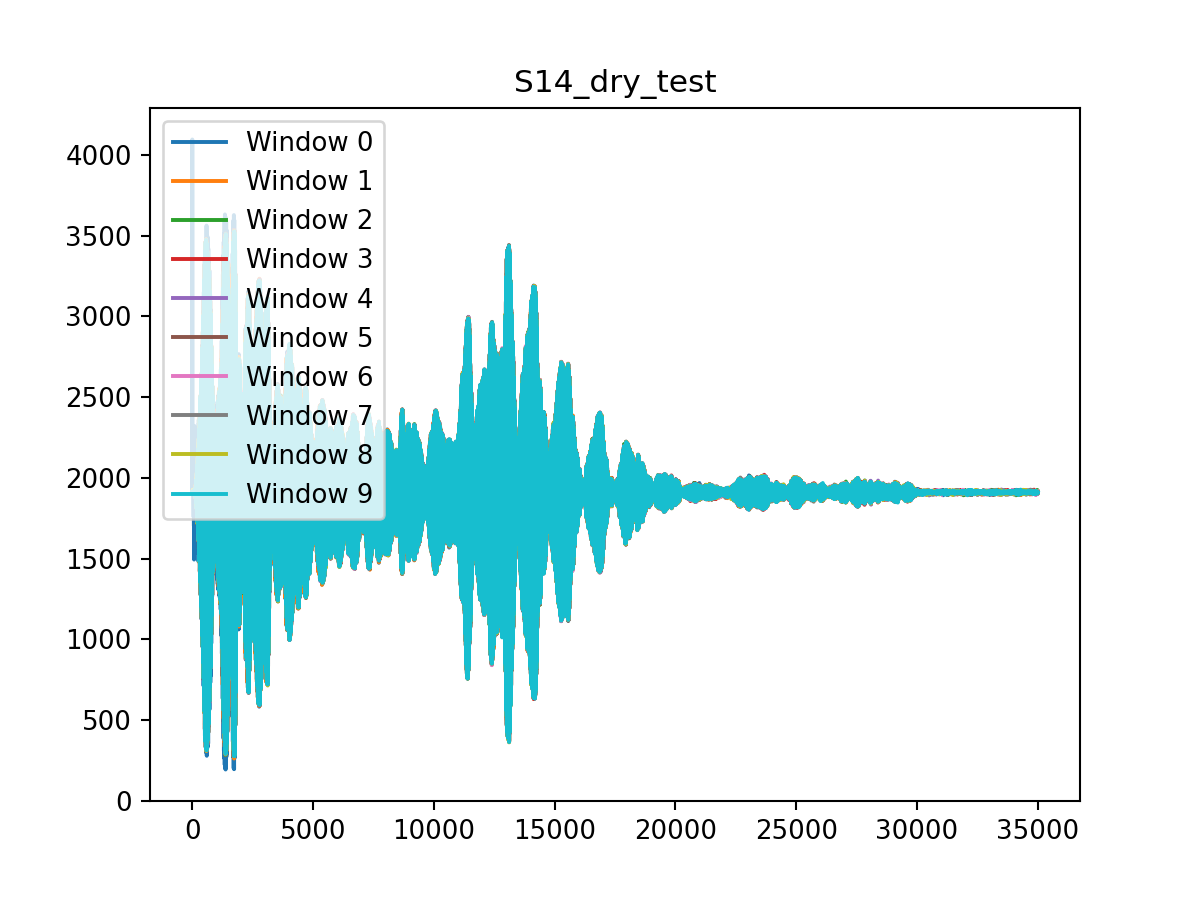

In [22]:
sample = 'S14_dry_test'
index = 0
plot_windows(sample, index)

Data shape:  torch.Size([165, 1, 35000])


<IPython.core.display.Javascript object>


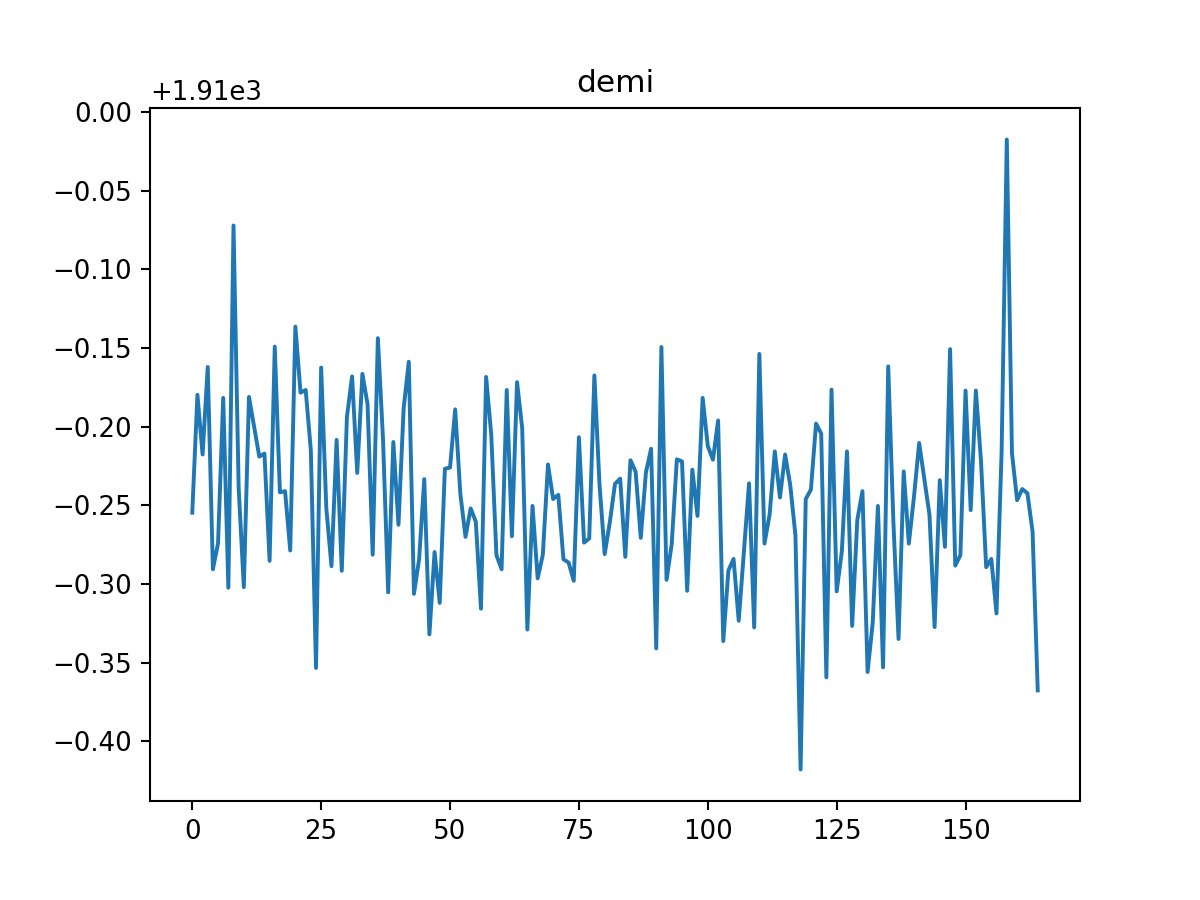

In [23]:
sample = 'demi'
plot_mean(sample)

Data shape:  torch.Size([165, 1, 35000])


<IPython.core.display.Javascript object>


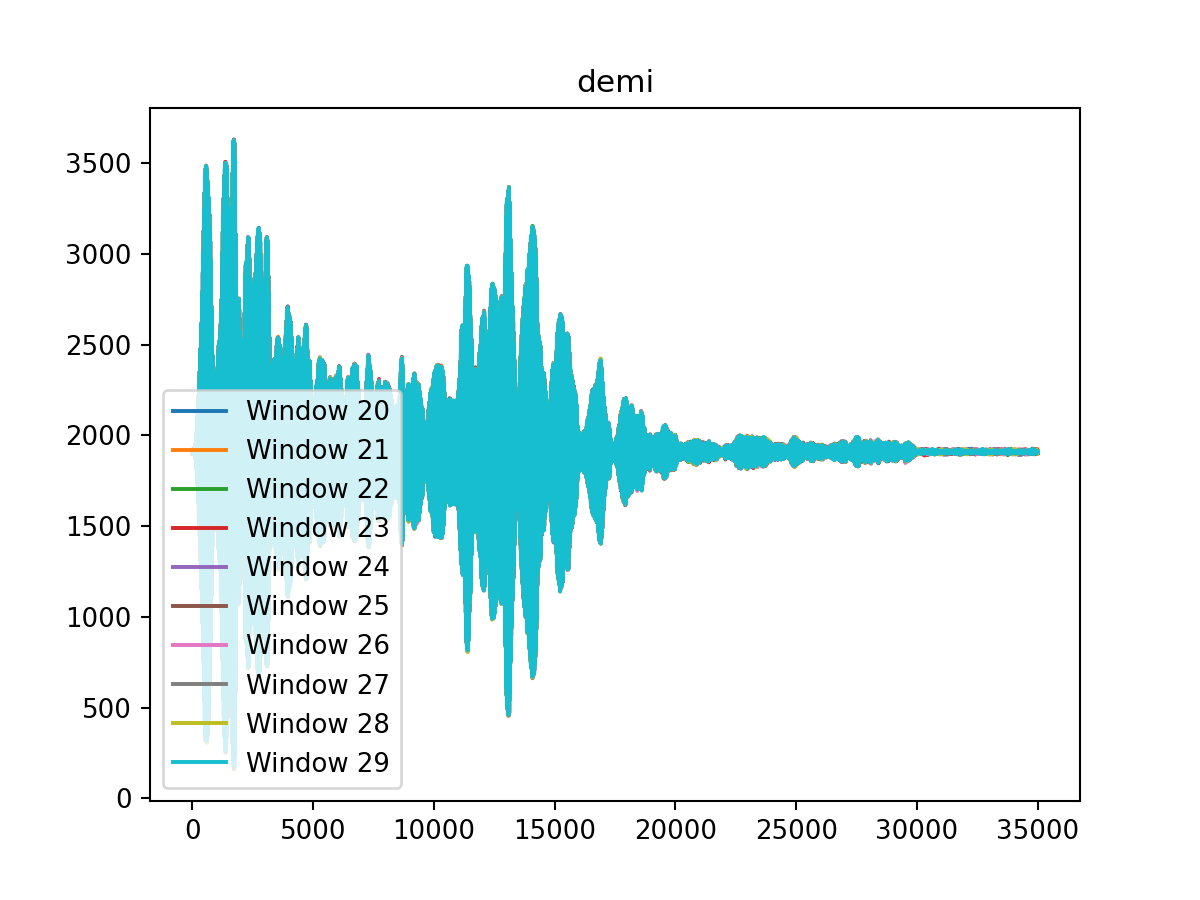

In [24]:
sample = 'demi'
index = 20
plot_windows(sample, index)

Data shape:  torch.Size([220, 1, 35000])


<IPython.core.display.Javascript object>


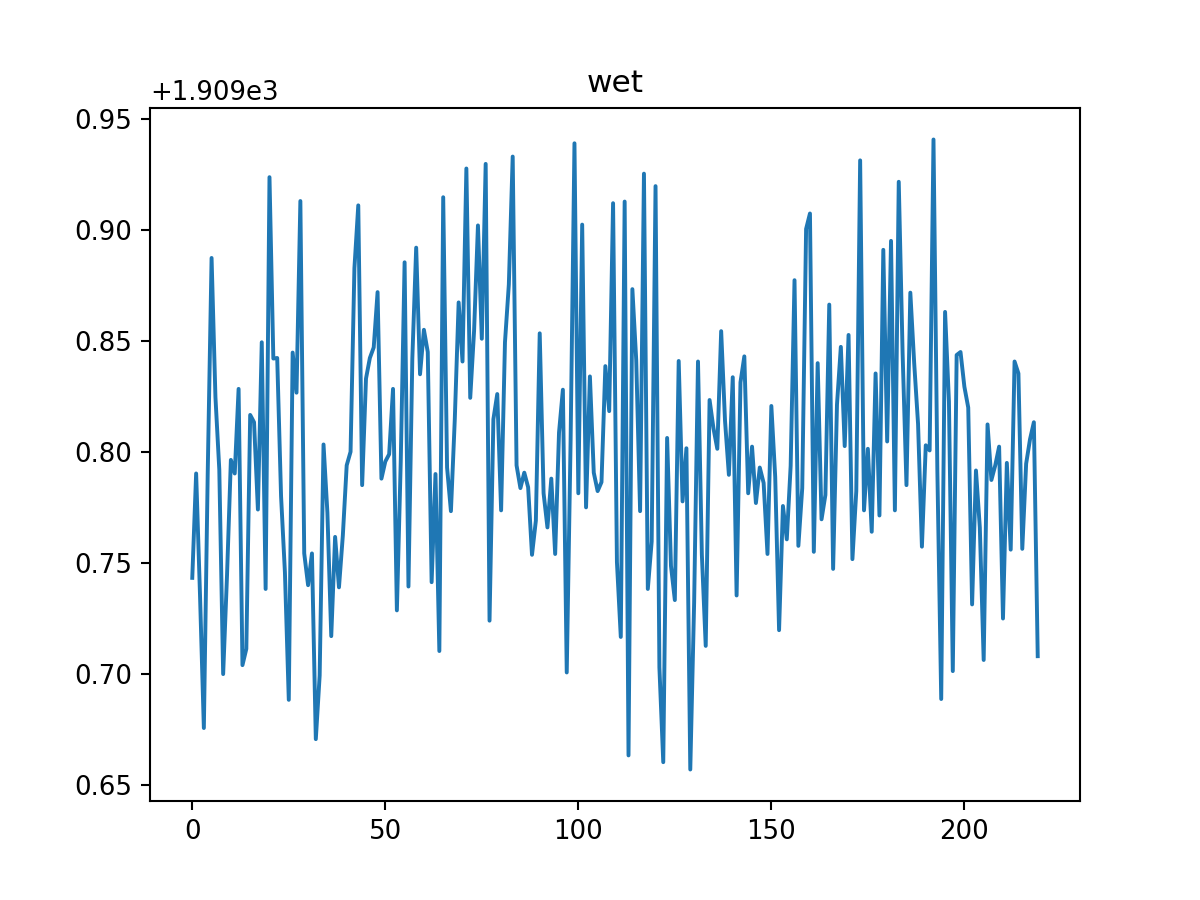

In [25]:
sample = 'wet'
plot_mean(sample)

Data shape:  torch.Size([220, 1, 35000])


<IPython.core.display.Javascript object>


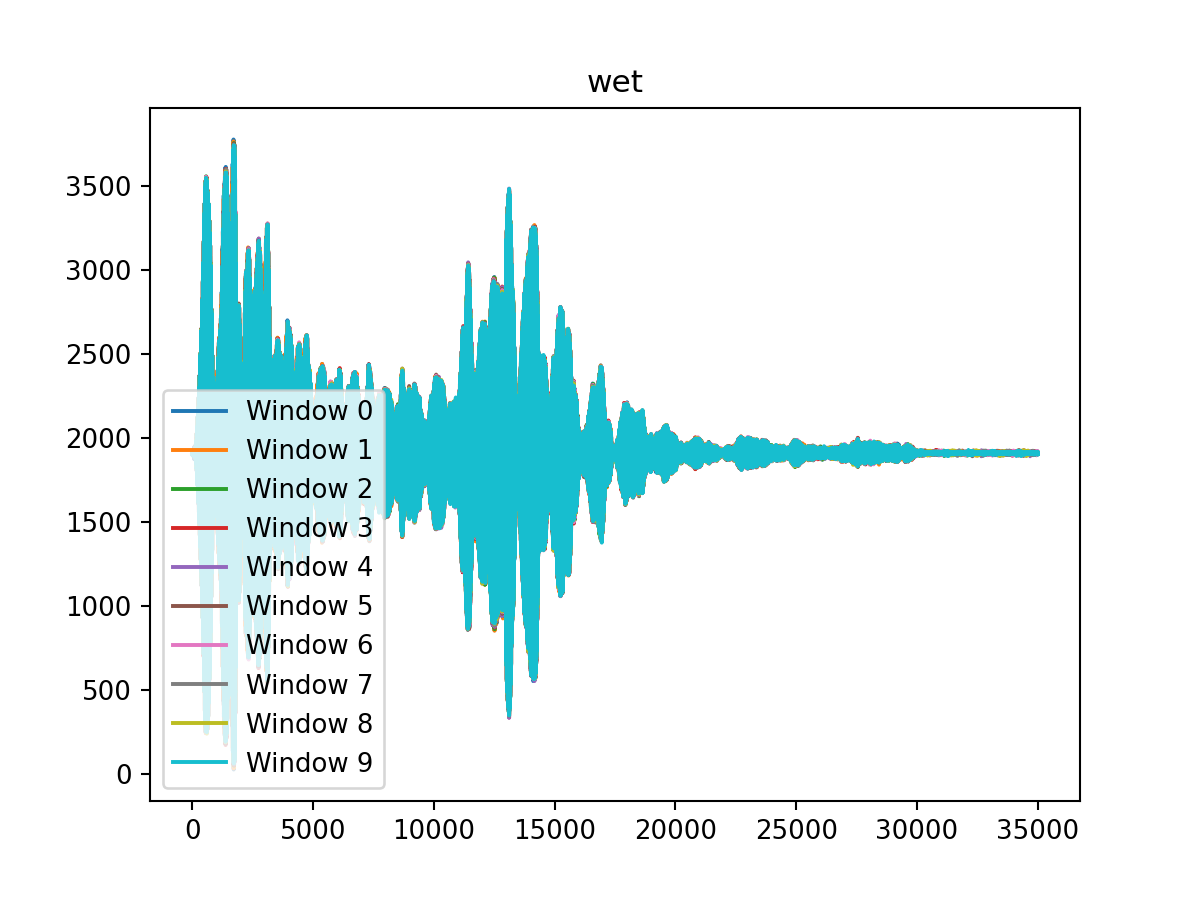

In [26]:
sample = 'wet'
index = 0
plot_windows(sample, index)